In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlite3
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler 
from scipy.stats import rv_discrete

import importlib
import funciones_eda
importlib.reload(funciones_eda)
from funciones_eda import *

import importlib
import funciones_m
importlib.reload(funciones_m)
from funciones_m import *

import importlib
import funciones_distribucion
importlib.reload(funciones_distribucion)
from funciones_distribucion import *

In [2]:
url = 'df_filtrado.csv'
df = pd.read_csv(url, index_col=None)
df.drop('index', axis=1, inplace=True)

### Muestreo aleatorio y sesgo de la muestra

### Distribución muestral de la media

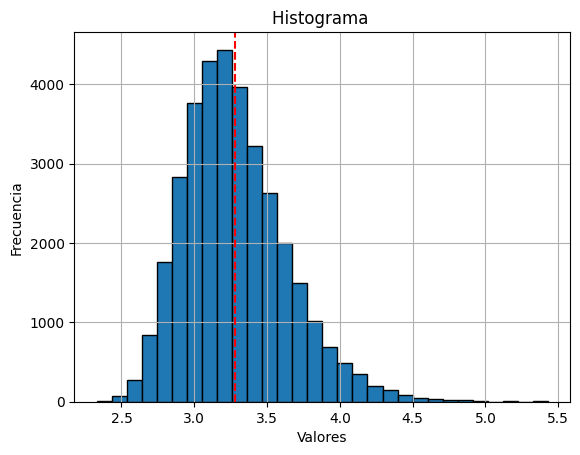

In [3]:
ditribucion_muestral_f,error_estandar_=ditribucion_muestral(df,'QTY')
histograma(ditribucion_muestral_f)

La distribución muestral de la media se ve simétrica y en forma de campana, lo que concuerda con el Teorema del Límite Central (TLC). Esto significa que incluso si los datos originales no eran normales, la distribución muestral de los medios tiende a ser normal a medida que el tamaño de muestra aumenta.

Al usar datos no normales, el TLC nos ayuda a aproximarnos a condiciones normales para trabajar con algoritmos estadísticos.

In [4]:
error_estandar_

0.0181643354063143

Este valor indica que, en promedio, las medias muestrales varían alrededor de la verdadera media poblacional por aproximadamente 0.01728 unidades .
Es un valor muy pequeño, lo que sugiere que las muestras son bastante consistentes y están muy cerca de los medios reales de la población.

In [5]:
resumen_distribucion(df,'QTY')

poblacion 34693
tamaño de la muestra 380
media poblacional 3.3
media aleatoria 3.2
error estandar 0.3
intervalo_confianza (2.5460640588974837, 3.8328833095235693)
La media poblacional está dentro del intervalo de confianza.


La media poblacional está dentro del intervalo de confianza , lo que sugiere que la estimación basada en la muestra es válida.
El error estándar es lo suficientemente pequeño para garantizar una buena precisión en la estimación.
No hay discrepancias significativas entre los medios poblacionales y los medios muestrales.
En resumen, los datos sugieren que la muestra fue adecuada para inferir sobre la población y que la media poblacional estimada de 3.3 es consistente con los resultados.


no hay evidencia de que la estimación en la muestra sea incorrecta o sesgada

### Remuestreo frente a bootstrapping 

Cuando seleccionas un elemento de la población, ese elemento ya no está disponible para que
Esto garantiza que los elementos en la muestra sean únicos .

In [6]:
muestrales_con_remplazo,muestrales_sin_remplazo=ditribucion_muestral_bossting(df,'QTY')

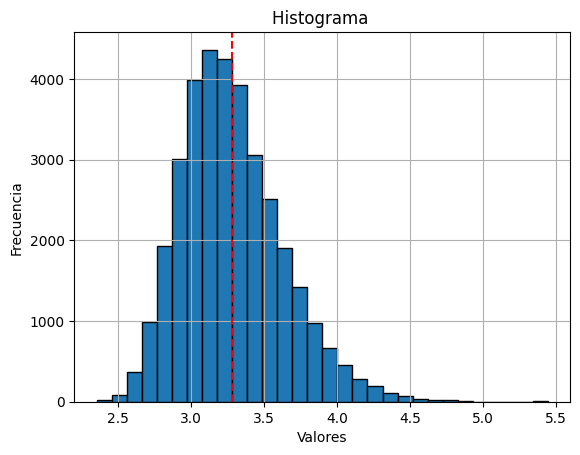

In [7]:
histograma(muestrales_sin_remplazo)

Ambas distribuciones tienen una forma de campana simétrica, lo que indica que siguen una distribución aproximadamente normal .
Esto es consistente con el Teorema del Límite Central , que estable

Sin reemplazo, las muestras son más representativas de la población porque todos los elementos seleccionados son únicos,

Ambas distribuciones son consistentes con el Teorema del Límite Central y proporcionan buenas estimaciones de los medios poblacionales.
Sin embargo:
Con reemplazo introduce más variabilidad en los medios muestrales, siendo útil en simulaciones como bootstrapping.
Sin reemplazo es más preciso y representativo cuando el tamaño de la muestra es comparable al tamaño de la población.

### Distribución normal

El diagrama QQ compara los cuantiles de los datos observados con los cuantiles de una distribución teórica (normal en este caso). Si los puntos caen cerca de la línea diagonal, significa que los datos siguen la distribución normal.

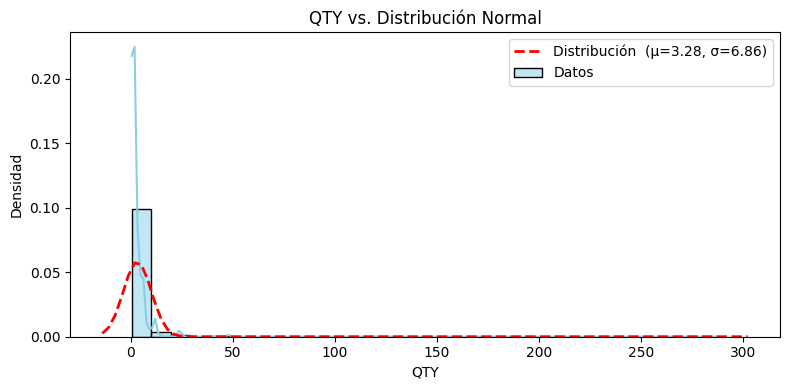

In [11]:
plot_normal_distribution(df, ['QTY'])

tienen una distribución altamente asimétrica hacia la derecha, con un fuerte pico en valores pequeños y una larga cola hacia valores altos.
La curva de distribución normal ajustada (línea roja discontinua) no representa bien los datos, ya que la distribución real es muy diferente de la forma de campana esperada de una normal.

Los datos no siguen una distribución normal.
La asimetría indica que los valores extremos (outliers) están presentes, lo que contribuye a la cola larga de la distribución.

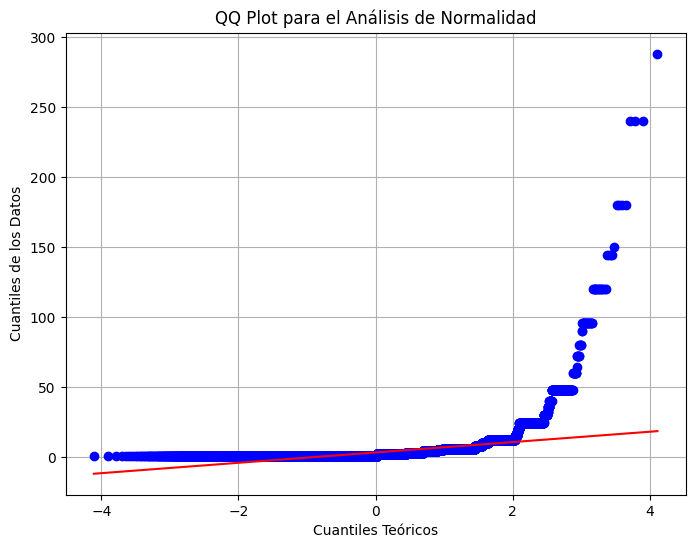

In [9]:
qq_plot(df['QTY'])

Los puntos azules en el gráfico QQ representan los cuantiles observados de los datos comparados con los cuantiles teóricos de una distribución normal (línea roja).
Los puntos se desvían significativamente de la línea roja, especialmente en los extremos.
Esto confirma que los datos no siguen una distribución normal. Los valores extremos (outliers) están contribuyendo al comportamiento observado

El diagrama QQ muestra una clara desviación de la normalidad, especialmente en los cuantiles superiores (cola derecha).
Esto confirma que los datos no se ajustan a una distribución normal y presentan asimetría.